In [22]:
import nibabel as nib 
import matplotlib.pyplot as plt 
import numpy as np
import os
from tqdm import tqdm
import seaborn as sns
import pandas as pd

In [104]:
non_harmonized = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized"

files = sorted(os.listdir(non_harmonized))

cases = []
controls = []

cases_files = []

for file in tqdm(files):
    if file.endswith("_control"):
        print("Control:", file)
        control = nib.load(os.path.join(non_harmonized, file, "log_jacobian_det.nii.gz")).get_fdata()
        controls.append(control.flatten())
    else:
        #Add only 20 cases and keep a track of the name of the files
        print("Case:",file)
        case = nib.load(os.path.join(non_harmonized, file, "log_jacobian_det.nii.gz")).get_fdata()
        cases_files.append(file)
        cases.append(case.flatten())


 12%|█▏        | 6/50 [00:00<00:00, 49.15it/s]

Case: masked_COPDGene_A43240_STANDARD
Control: masked_COPDGene_A61757_STANDARD_control
Case: masked_COPDGene_B05639_STANDARD
Case: masked_COPDGene_B14644_STANDARD
Control: masked_COPDGene_B15777_STANDARD_control
Control: masked_COPDGene_B17236_STANDARD_control
Control: masked_COPDGene_B17317_STANDARD_control
Control: masked_COPDGene_B72303_STANDARD_control
Case: masked_COPDGene_B86334_STANDARD
Control: masked_COPDGene_C05262_STANDARD_control
Control: masked_COPDGene_C19536_STANDARD_control


 36%|███▌      | 18/50 [00:00<00:00, 53.87it/s]

Control: masked_COPDGene_C40785_STANDARD_control
Control: masked_COPDGene_C53764_STANDARD_control
Control: masked_COPDGene_C64141_STANDARD_control
Control: masked_COPDGene_C64303_STANDARD_control
Case: masked_COPDGene_C64585_STANDARD
Control: masked_COPDGene_C73437_STANDARD_control
Control: masked_COPDGene_D32260_STANDARD_control
Case: masked_COPDGene_D36309_STANDARD
Control: masked_COPDGene_D41724_STANDARD_control
Case: masked_COPDGene_D48362_STANDARD
Case: masked_COPDGene_D70993_STANDARD
Control: masked_COPDGene_D80990_STANDARD_control
Case: masked_COPDGene_D90444_STANDARD


 60%|██████    | 30/50 [00:00<00:00, 51.56it/s]

Case: masked_COPDGene_E59904_STANDARD
Case: masked_COPDGene_E69868_STANDARD
Control: masked_COPDGene_E73754_STANDARD_control
Case: masked_COPDGene_F02607_STANDARD
Case: masked_COPDGene_F32094_STANDARD
Control: masked_COPDGene_F56917_STANDARD_control
Control: masked_COPDGene_F79779_STANDARD_control
Case: masked_COPDGene_F84738_STANDARD
Case: masked_COPDGene_G34805_STANDARD
Case: masked_COPDGene_G40486_STANDARD


 82%|████████▏ | 41/50 [00:00<00:00, 50.74it/s]

Control: masked_COPDGene_G85131_STANDARD_control
Case: masked_COPDGene_H01704_STANDARD
Case: masked_COPDGene_H18165_STANDARD
Case: masked_COPDGene_H42954_STANDARD
Control: masked_COPDGene_J54714_STANDARD_control
Case: masked_COPDGene_J66836_STANDARD
Case: masked_COPDGene_K11313_STANDARD
Case: masked_COPDGene_K29459_STANDARD
Case: masked_COPDGene_L32186_STANDARD
Case: masked_COPDGene_L75615_STANDARD
Case: masked_COPDGene_L84620_STANDARD


100%|██████████| 50/50 [00:00<00:00, 51.55it/s]

Case: masked_COPDGene_M77834_STANDARD
Case: masked_COPDGene_M84594_STANDARD
Case: masked_COPDGene_M98424_STANDARD
Case: masked_COPDGene_N18734_STANDARD
Case: masked_COPDGene_N93621_STANDARD


In [105]:
len(cases), len(controls)

(30, 20)

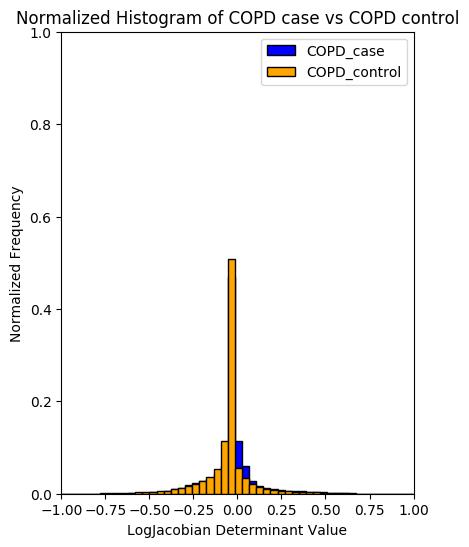

In [106]:
#plot a normalized histogram, makes more sense 
hist_case = cases[0]
hist_control = controls[0]
num_bins = 50 
hist,bin_edges = np.histogram(hist_case, bins=num_bins)
normalized_hist = hist/np.sum(hist)

hist_bin_control = np.histogram(hist_control, bins=num_bins)
normalized_hist_control = hist_bin_control[0]/np.sum(hist_bin_control[0])

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.bar(bin_edges[:-1], normalized_hist, width=np.diff(bin_edges), color = 'blue', edgecolor='black', label = "COPD_case")
plt.bar(bin_edges[:-1], normalized_hist_control, width=np.diff(bin_edges), color = 'orange', edgecolor='black', label = "COPD_control")
plt.xlabel('LogJacobian Determinant Value')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Histogram of COPD case vs COPD control')
plt.legend()
plt.xlim(-1.0, 1.0)
plt.ylim(0,1)


plt.show()


AttributeError: module 'matplotlib.pyplot' has no attribute 'kde'

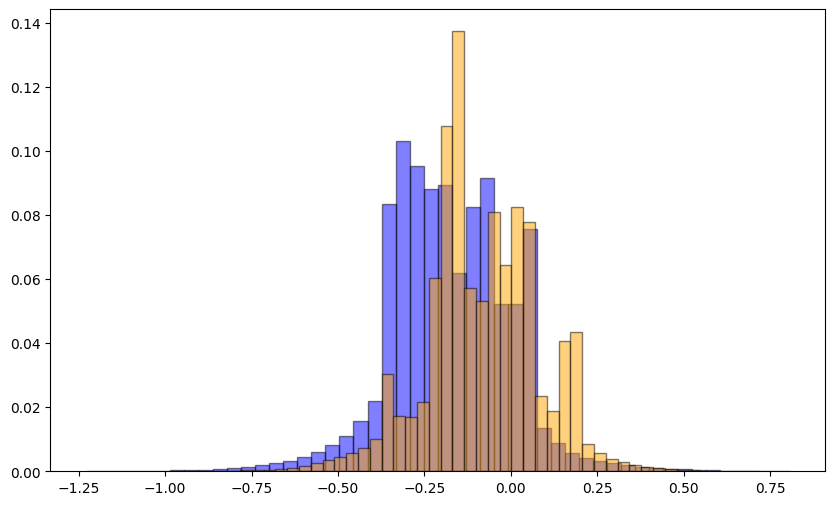

In [108]:
#normalize the histograms 
def normalize_histogram(faltten, num_bins):
    hist, bin_edges = np.histogram(faltten, bins=num_bins)
    normalized_hist = hist/np.sum(hist)
    return normalized_hist, bin_edges

histograms_cases = []
histograms_controls = []

for case, control in zip(cases, controls):
    normalized_hist_case, bin_edges_case = normalize_histogram(case.flatten(), num_bins)
    normalized_hist_control, bin_edges_control = normalize_histogram(control.flatten(), num_bins)
    histograms_cases.append(normalized_hist_case)
    histograms_controls.append(normalized_hist_control)

avg_hist_case = np.mean(histograms_cases, axis=0)
avg_hist_control = np.mean(histograms_controls, axis=0)

plt.figure(figsize=(10, 6))
# kde for this normalized histogram
plt.bar(bin_edges_case[:-1], avg_hist_case, width=np.diff(bin_edges_case), color='blue', edgecolor='black', label='COPD_Case', alpha = 0.5)
plt.bar(bin_edges_control[:-1], avg_hist_control, width=np.diff(bin_edges_control), color='orange', edgecolor='black', label='COPD_Control', alpha = 0.5)
sns.kdeplot(bin_edges_case[:-1], avg_hist_case, color='blue', label='COPD_Case')
sns.kdeplot(bin_edges_control[:-1], avg_hist_control, color='orange', label='COPD_Control')
plt.xlabel('Log Jacobian Determinant Value')
plt.ylabel('Normalized Frequency')
plt.title('Average Normalized Histogram of COPD Cases vs COPD Controls')
plt.legend()


In [100]:
non_harmonized = "/nfs/masi/krishar1/SPIE_2025_InhaleExhaleCT/data_split/registration_ANTS_command_line/ANTS_outputs_exptoinsp_harmonized"

files = sorted(os.listdir(non_harmonized))

cases = []
controls = []

for file in tqdm(files):
    if file.endswith("_control"):
        control = nib.load(os.path.join(non_harmonized, file, "log_jacobian_det.nii.gz")).get_fdata()
        controls.append(control.flatten())
    else:
        case = nib.load(os.path.join(non_harmonized, file, "log_jacobian_det.nii.gz")).get_fdata()
        cases.append(case.flatten())


100%|██████████| 50/50 [00:00<00:00, 54.49it/s]


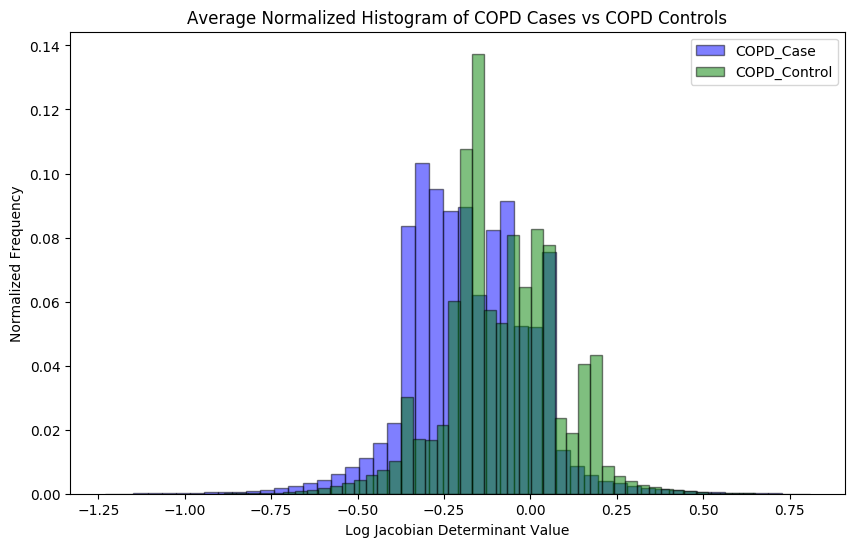

In [102]:
#normalize the histograms 
def normalize_histogram(faltten, num_bins):
    hist, bin_edges = np.histogram(faltten, bins=num_bins)
    normalized_hist = hist/np.sum(hist)
    return normalized_hist, bin_edges

num_bins = 50
histograms_cases = []
histograms_controls = []

for case, control in zip(cases, controls):
    normalized_hist_case, bin_edges_case = normalize_histogram(case.flatten(), num_bins)
    normalized_hist_control, bin_edges_control = normalize_histogram(control.flatten(), num_bins)
    histograms_cases.append(normalized_hist_case)
    histograms_controls.append(normalized_hist_control)

avg_hist_case = np.mean(histograms_cases, axis=0)
avg_hist_control = np.mean(histograms_controls, axis=0)

plt.figure(figsize=(10, 6))
#
plt.bar(bin_edges_case[:-1], avg_hist_case, width=np.diff(bin_edges_case), color='blue', edgecolor='black', label='COPD_Case', alpha = 0.5)
plt.bar(bin_edges_control[:-1], avg_hist_control, width=np.diff(bin_edges_control), color='green', edgecolor='black', label='COPD_Control', alpha = 0.5)
plt.xlabel('Log Jacobian Determinant Value')
plt.ylabel('Normalized Frequency')
plt.title('Average Normalized Histogram of COPD Cases vs COPD Controls')
plt.legend()
